In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train  = pd.read_csv(r'C:\Users\shubham\Desktop\JS\train.csv')
df_test  = pd.read_csv(r'C:\Users\shubham\Desktop\JS\test.csv')

In [3]:
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [4]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
#check for null or missing values
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
#we fill the missing values with mean(item_weight) and mode(outlet_size)
df_train.describe() #describe function displays the statistical values of all the numeric columns

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
df_train['Item_Weight'].describe() # or df_train.Item_Weight

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [10]:
df_train.Item_Weight.fillna(df_train.Item_Weight.mean(), inplace=True) #fillna is fill null function
df_test.Item_Weight.fillna(df_test.Item_Weight.mean(), inplace=True)

In [11]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
df_train.Outlet_Size.value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [13]:
df_train.Outlet_Size.mode()

0    Medium
Name: Outlet_Size, dtype: object

In [14]:
df_train.Outlet_Size.fillna(df_train.Outlet_Size.mode()[0], inplace=True)
df_test.Outlet_Size.fillna(df_test.Outlet_Size.mode()[0], inplace=True)

In [15]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [16]:
#selecting features based on requirements and dropping the rest
df_train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'], axis=1, inplace=True)
df_test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'], axis=1, inplace=True)

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           8523 non-null   float64
 1   Item_Fat_Content      8523 non-null   object 
 2   Item_Visibility       8523 non-null   float64
 3   Item_Type             8523 non-null   object 
 4   Item_MRP              8523 non-null   float64
 5   Outlet_Size           8523 non-null   object 
 6   Outlet_Location_Type  8523 non-null   object 
 7   Outlet_Type           8523 non-null   object 
 8   Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(4), object(5)
memory usage: 599.4+ KB


In [18]:
#EDA - Exploratory Data Analysis

#using Dtale library
import dtale

In [19]:
dtale.show(df_train)

In [20]:
#checking heatmap/ correlation using seaborn
# plt.figure(figsize=(10,5))
# sns.heatmap(df_train.corr(), annot=True)
# plt.show()

In [21]:
#using klib library
import klib

In [22]:
klib.corr_mat(df_train)

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Weight,1.00,-0.01,0.02,0.01
Item_Visibility,-0.01,1.00,-0.00,-0.13
Item_MRP,0.02,-0.00,1.00,0.57
Item_Outlet_Sales,0.01,-0.13,0.57,1.00


<Axes: title={'center': 'Feature-correlation (pearson)'}>

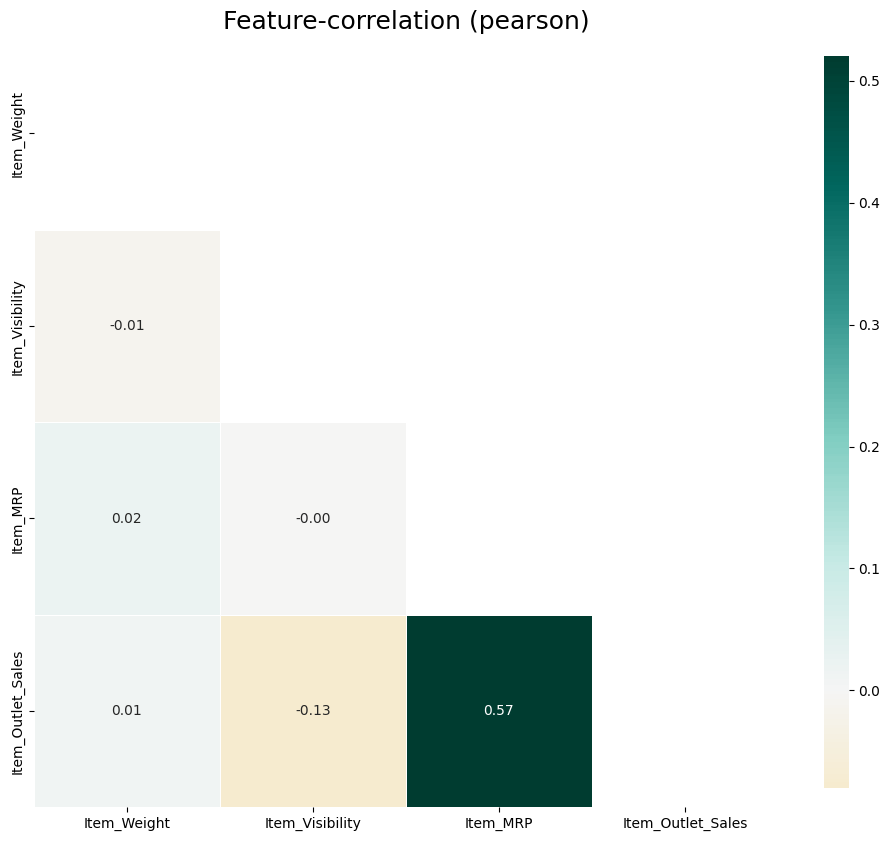

In [23]:
klib.corr_plot(df_train)

GridSpec(6, 5)

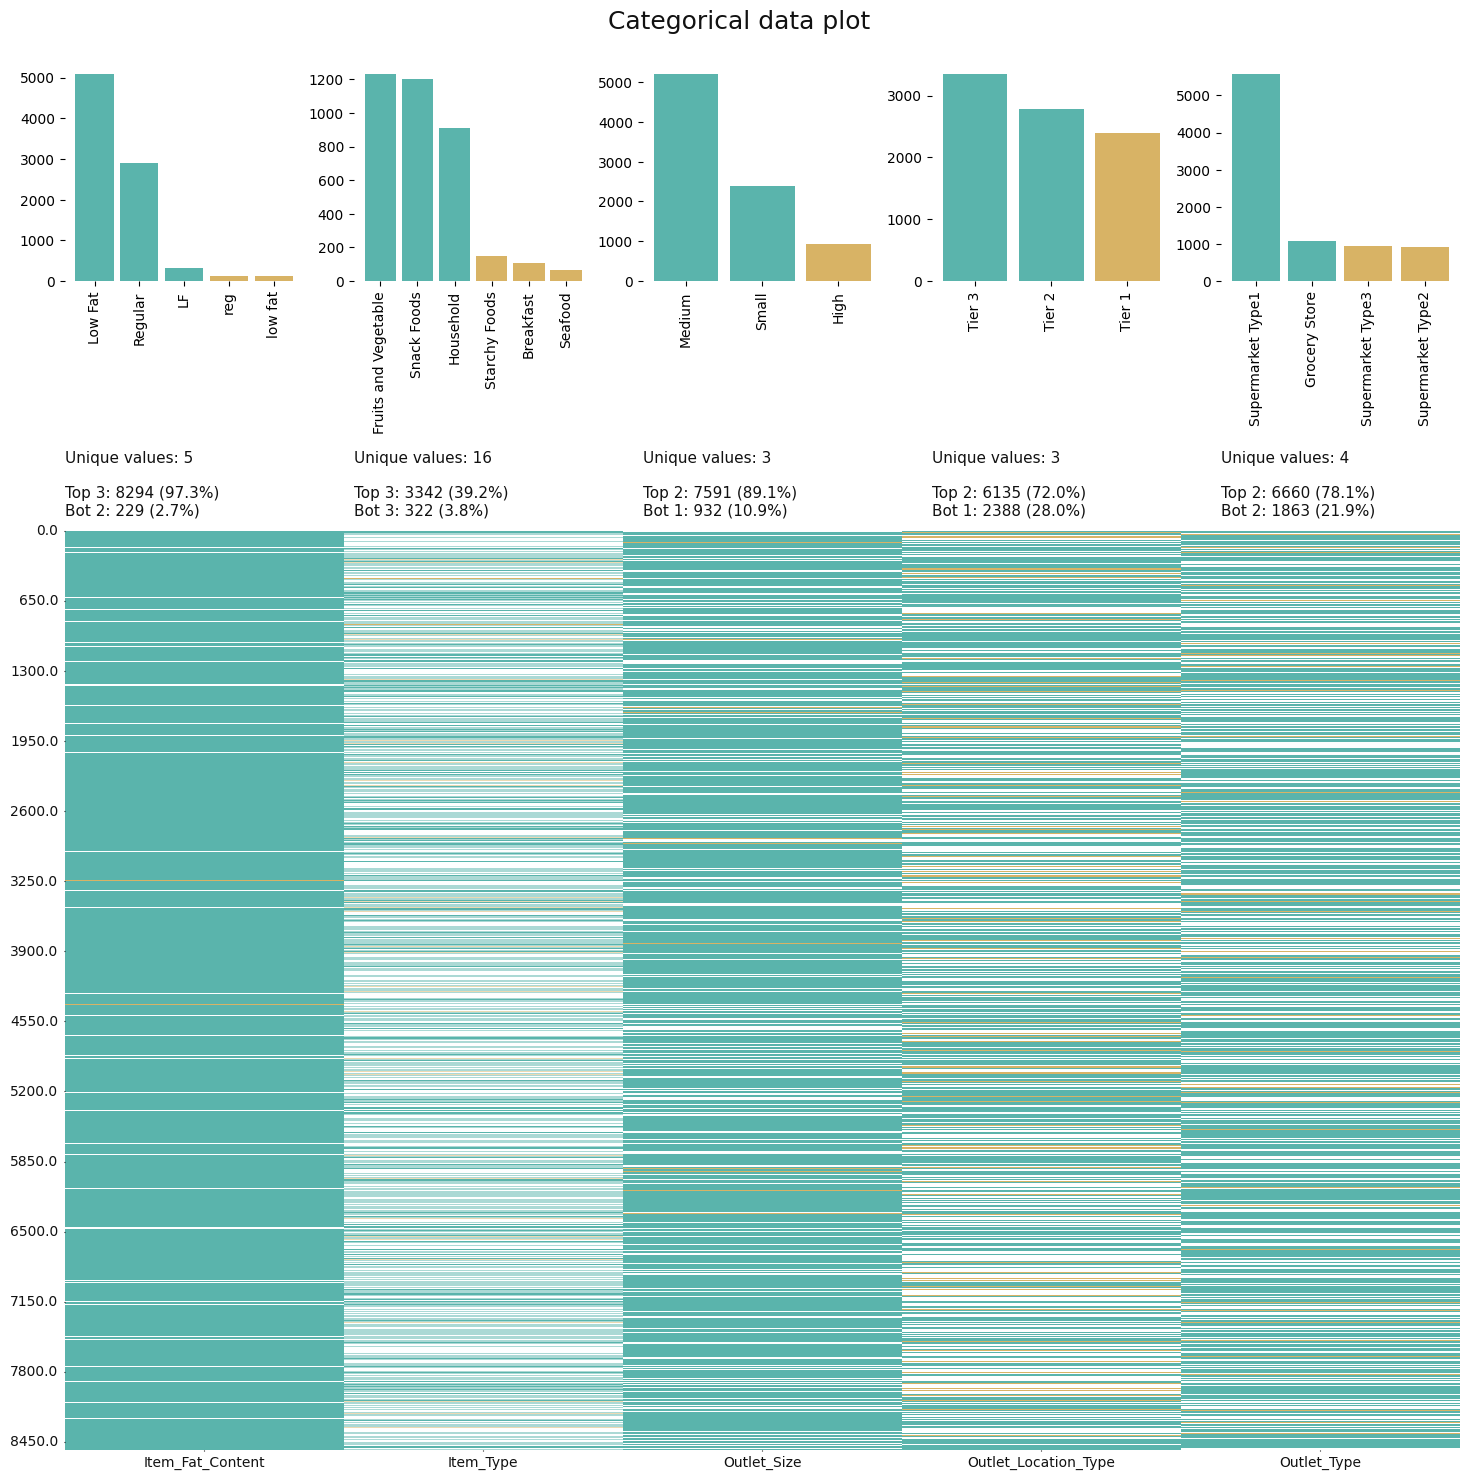

In [24]:
klib.cat_plot(df_train) #returns a visualization of the number and frequency of categorical features

<Axes: xlabel='Item_Weight', ylabel='Density'>

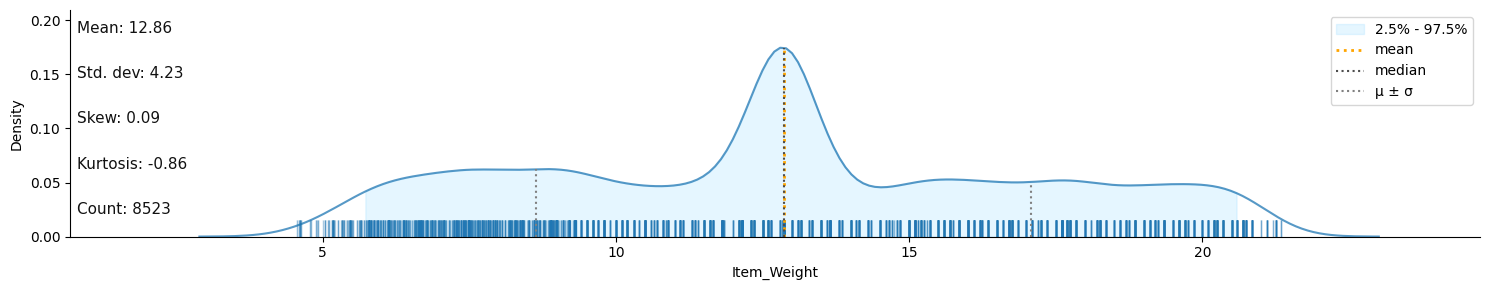

In [25]:
klib.dist_plot(df_train)

In [26]:
klib.missingval_plot(df_train)

No missing values found in the dataset.


In [27]:
# data cleaning (using klib library)
klib.data_cleaning(df_train) #performs data cleaning (drop duplicates & empty rows/cols, adjust dtypes, ...)

Shape of cleaned data: (8523, 9) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.42 MB (-71.19%)



,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,Low Fat,0.016047,Dairy,249.809204,Medium,Tier 1,Supermarket Type1,3735.137939
1,5.920000,Regular,0.019278,Soft Drinks,48.269199,Medium,Tier 3,Supermarket Type2,443.422791
2,17.500000,Low Fat,0.016760,Meat,141.617996,Medium,Tier 1,Supermarket Type1,2097.270020
3,19.200001,Regular,0.000000,Fruits and Vegetables,182.095001,Medium,Tier 3,Grocery Store,732.380005
4,8.930000,Low Fat,0.000000,Household,53.861401,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...
8518,6.865000,Low Fat,0.056783,Snack Foods,214.521805,High,Tier 3,Supermarket Type1,2778.383301
8519,8.380000,Regular,0.046982,Baking Goods,108.156998,Medium,Tier 2,Supermarket Type1,549.284973
8520,10.600000,Low Fat,0.035186,Health and Hygiene,85.122398,Small,Tier 2,Supermarket Type1,1193.113647
8521,7.210000,Regular,0.145221,Snack Foods,103.133202,Medium,Tier 3,Supermarket Type2,1845.597656


In [28]:
klib.clean_column_names(df_train) # cleans and standardizes column names, also called inside data_cleaning()

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,Medium,Tier 3,Supermarket Type2,1845.5976


In [29]:
df_train = klib.convert_datatypes(df_train) #converts existing to more efficient dtypes, also called inside_cleaning()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   item_weight           8523 non-null   float32 
 1   item_fat_content      8523 non-null   category
 2   item_visibility       8523 non-null   float32 
 3   item_type             8523 non-null   category
 4   item_mrp              8523 non-null   float32 
 5   outlet_size           8523 non-null   category
 6   outlet_location_type  8523 non-null   category
 7   outlet_type           8523 non-null   category
 8   item_outlet_sales     8523 non-null   float32 
dtypes: category(5), float32(4)
memory usage: 176.2 KB


In [30]:
klib.mv_col_handling(df_train) #drops features with high ratio of missing values

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,Low Fat,0.016047,Dairy,249.809204,Medium,Tier 1,Supermarket Type1,3735.137939
1,5.920000,Regular,0.019278,Soft Drinks,48.269199,Medium,Tier 3,Supermarket Type2,443.422791
2,17.500000,Low Fat,0.016760,Meat,141.617996,Medium,Tier 1,Supermarket Type1,2097.270020
3,19.200001,Regular,0.000000,Fruits and Vegetables,182.095001,Medium,Tier 3,Grocery Store,732.380005
4,8.930000,Low Fat,0.000000,Household,53.861401,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...
8518,6.865000,Low Fat,0.056783,Snack Foods,214.521805,High,Tier 3,Supermarket Type1,2778.383301
8519,8.380000,Regular,0.046982,Baking Goods,108.156998,Medium,Tier 2,Supermarket Type1,549.284973
8520,10.600000,Low Fat,0.035186,Health and Hygiene,85.122398,Small,Tier 2,Supermarket Type1,1193.113647
8521,7.210000,Regular,0.145221,Snack Foods,103.133202,Medium,Tier 3,Supermarket Type2,1845.597656


In [31]:
klib.pool_duplicate_subsets(df_train) #pools subsets of columns based on duplicates with minimum loss of information

,item_visibility,item_mrp,item_outlet_sales,pooled_vars
0,0.016047,249.809204,3735.137939,0
1,0.019278,48.269199,443.422791,1
2,0.016760,141.617996,2097.270020,2
3,0.000000,182.095001,732.380005,3
4,0.000000,53.861401,994.705200,4
...,...,...,...,...
8518,0.056783,214.521805,2778.383301,8518
8519,0.046982,108.156998,549.284973,8279
8520,0.035186,85.122398,1193.113647,8520
8521,0.145221,103.133202,1845.597656,8521


In [32]:
#preprocessing task before model building (label encoding, splitting, standardization)

In [33]:
#label encoding
from sklearn.preprocessing import LabelEncoder
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   item_weight           8523 non-null   float32 
 1   item_fat_content      8523 non-null   category
 2   item_visibility       8523 non-null   float32 
 3   item_type             8523 non-null   category
 4   item_mrp              8523 non-null   float32 
 5   outlet_size           8523 non-null   category
 6   outlet_location_type  8523 non-null   category
 7   outlet_type           8523 non-null   category
 8   item_outlet_sales     8523 non-null   float32 
dtypes: category(5), float32(4)
memory usage: 176.2 KB


In [34]:
le = LabelEncoder()
# df_train = df_train.apply(le.fit_transform)
df_train['item_fat_content']= le.fit_transform(df_train['item_fat_content'])
df_train['item_type']= le.fit_transform(df_train['item_type'])
df_train['outlet_size']= le.fit_transform(df_train['outlet_size'])
df_train['outlet_location_type']= le.fit_transform(df_train['outlet_location_type'])
df_train['outlet_type']= le.fit_transform(df_train['outlet_type'])
df_train.head()

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,1,0.016047,4,249.809204,1,0,1,3735.137939
1,5.920000,2,0.019278,14,48.269199,1,2,2,443.422791
2,17.500000,1,0.016760,10,141.617996,1,0,1,2097.270020
3,19.200001,2,0.000000,6,182.095001,1,2,0,732.380005
4,8.930000,1,0.000000,9,53.861401,0,2,1,994.705200


In [35]:
#one hot encoding
from sklearn.preprocessing import OneHotEncoder

In [36]:
OHE = OneHotEncoder()
# df_train = pd.get_dummies(df_train, columns=['item_fat_content','outlet_size','outlet_location_type','outlet_type'])
# df_train.head()

In [37]:
#splitting the data to train and test
from sklearn.model_selection import train_test_split

In [38]:
X = df_train.drop('item_outlet_sales',axis=1)
Y = df_train.item_outlet_sales
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=101,test_size=0.2)

In [39]:
#standardization
from sklearn.preprocessing import StandardScaler

In [40]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [41]:
import joblib
joblib.dump(sc,r'C:\Users\shubham\Desktop\sales_prediction_model\sales_prediction_project\models\standard_scaler.sav')

['C:\\Users\\shubham\\Desktop\\sales_prediction_model\\sales_prediction_project\\models\\standard_scaler.sav']

In [42]:
#model building


In [43]:
#Liner Regression
from sklearn.linear_model import LinearRegression

In [44]:
LR = LinearRegression()
LR.fit(X_train_std,Y_train)

LinearRegression()

In [45]:
Y_pred_LR = LR.predict(X_test_std)

In [46]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(r2_score(Y_test,Y_pred_LR))
print(mean_absolute_error(Y_test,Y_pred_LR))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_LR)))

0.5041231642108746
880.83395864769
1162.516769570633


In [47]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

In [48]:
RF = RandomForestRegressor(n_estimators=100, max_depth=12, max_features='sqrt')
RF.fit(X_train,Y_train)

RandomForestRegressor(max_depth=12, max_features='sqrt')

In [49]:
Y_pred_RF = RF.predict(X_test)

In [50]:
print(r2_score(Y_test,Y_pred_RF))
print(mean_absolute_error(Y_test,Y_pred_RF))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_RF)))

0.5883300374590559
756.3826187470092
1059.2217883968165


In [51]:
joblib.dump(RF,r'C:\Users\shubham\Desktop\sales_prediction_model\sales_prediction_project\models\Random_forest_regressor.sav')

['C:\\Users\\shubham\\Desktop\\sales_prediction_model\\sales_prediction_project\\models\\Random_forest_regressor.sav']

In [52]:
#Hyper Parameter Tuning
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [53]:
#define model and parameters
model = RandomForestRegressor()
n_estimators = [10,100,1000]
max_depth = range(1,31)
min_samples_leaf = np.linspace(0.1,1.0)
max_features = ["sqrt","log2"]
min_samples_split = np.linspace(0.1,1.0,10)

#define grid search
grid = dict(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features)
#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)
grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, scoring='r2', error_score=0, verbose=2, cv=2)
grid_search_forest.fit(X_train_std, Y_train)

Fitting 2 folds for each of 180 candidates, totalling 360 fits


GridSearchCV(cv=2, error_score=0, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(1, 31),
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 100, 1000]},
             scoring='r2', verbose=2)

In [54]:
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Best: 0.592 using {'max_depth': 8, 'max_features': 'log2', 'n_estimators': 1000}
0.180 (0.020) with: {'max_depth': 1, 'max_features': 'sqrt', 'n_estimators': 10}
0.197 (0.009) with: {'max_depth': 1, 'max_features': 'sqrt', 'n_estimators': 100}
0.183 (0.005) with: {'max_depth': 1, 'max_features': 'sqrt', 'n_estimators': 1000}
0.175 (0.007) with: {'max_depth': 1, 'max_features': 'log2', 'n_estimators': 10}
0.241 (0.016) with: {'max_depth': 1, 'max_features': 'log2', 'n_estimators': 100}
0.233 (0.005) with: {'max_depth': 1, 'max_features': 'log2', 'n_estimators': 1000}
0.364 (0.025) with: {'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 10}
0.319 (0.011) with: {'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 100}
0.306 (0.007) with: {'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 1000}
0.379 (0.011) with: {'max_depth': 2, 'max_features': 'log2', 'n_estimators': 10}
0.366 (0.013) with: {'max_depth': 2, 'max_features': 'log2', 'n_estimators': 100}
0.378 (0.004) with

In [55]:
grid_search_forest.best_params_

{'max_depth': 8, 'max_features': 'log2', 'n_estimators': 1000}

In [56]:
grid_search_forest.best_score_

0.5921842064388674

In [57]:
Y_pred_RF_grid = grid_search_forest.predict(X_test_std)
r2_score(Y_test,Y_pred_RF_grid)

0.5938811642615862

In [58]:
#save your model
import joblib

In [59]:
joblib.dump(grid_search_forest, r'C:\Users\shubham\Desktop\sales_prediction_model\sales_prediction_project\models\Random_forest_grid.sav')

['C:\\Users\\shubham\\Desktop\\sales_prediction_model\\sales_prediction_project\\models\\Random_forest_grid.sav']

In [60]:
#loading the model
model = joblib.load(r'C:\Users\shubham\Desktop\sales_prediction_model\sales_prediction_project\models\Random_forest_grid.sav')
model.predict(X_test_std)

array([1546.4545059 , 2701.80517786, 1359.7068069 , ...,  572.95499683,
       1692.9410174 , 2581.29224425])

2023-08-16 23:51:20,924 - INFO     - Executing shutdown due to inactivity...
2023-08-16 23:51:33,352 - INFO     - Executing shutdown...
2023-08-16 23:51:33,362 - ERROR    - Exception on /shutdown [GET]
Traceback (most recent call last):
  File "C:\Users\shubham\AppData\Roaming\Python\Python39\site-packages\flask\app.py", line 2529, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\shubham\AppData\Roaming\Python\Python39\site-packages\flask\app.py", line 1825, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\shubham\AppData\Roaming\Python\Python39\site-packages\flask\app.py", line 1823, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\shubham\AppData\Roaming\Python\Python39\site-packages\flask\app.py", line 1799, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "C:\Users\shubham\AppData\Roaming\Python\Python39\site-packages\dtale\app.py", line 440, in s